In [1]:
import os
import pathlib
import sys
import socket

hostname = socket.gethostname()

abs_path = str(pathlib.Path(hostname).parent.absolute())
WORKDIR = abs_path[:- (len(abs_path.split('/')[-2] + abs_path.split('/')[-1])+1)]


if "mimi" in hostname:
    print(hostname)
    DATA_DIR = "/scratch/franzihe/"
    FIG_DIR = "/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6/"
elif "glefsekaldt" in hostname: 
    DATA_DIR = "/home/franzihe/Data/"
    FIG_DIR = "/home/franzihe/Documents/Figures/CMIP6/"

INPUT_DATA_DIR = os.path.join(DATA_DIR, 'input')
OUTPUT_DATA_DIR = os.path.join(DATA_DIR, 'output')
UTILS_DIR = os.path.join(WORKDIR, 'utils')

sys.path.append(UTILS_DIR)
# make figure directory
try:
    os.mkdir(FIG_DIR)
except OSError:
    pass

mimi.uio.no


## Import python packages
- `Python` environment requirements: file [requirements_globalsnow.txt](../../requirements_globalsnow.txt) 
- load `python` packages from [imports.py](../../utils/imports.py)
- load `functions` from [functions.py](../../utils/functions.py)


In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
from imports import(pd, glob, np, plt, wget,cm)


In [3]:
# reload imports
%load_ext autoreload
%autoreload 2

In [4]:
cmip_in = os.path.join(INPUT_DATA_DIR, 'cmip6_hist')
cmip_out = os.path.join(INPUT_DATA_DIR, 'cmip6_hist/daily_means')
# make output data directory
try:
    os.mkdir(cmip_out)
    os.mkdir(cmip_in)
except OSError:
    pass

In [5]:
da = pd.DataFrame()
# for file in sorted(glob('{}/*clw_cli_clivi_lwp_tas_prsn*.json'.format(cmip_in))):
for file in sorted(glob('{}/*clw_cli_clivi_lwp_tas_prsn_pfull*.json'.format(cmip_in))):

# for file in sorted(glob('esgf_search*')):
    print('reading file:', file)
    df = pd.read_json(file)
    
    _da = pd.DataFrame({'index': range(len(df['response']['docs']))}, columns=['index',
                        'activity_id',
                        'institution_id',
                        'source_id',
                        'xloc',
                        'experiment_id',
                        'member_id',
                        'yloc',
                        'table_id',
                        'variable_id',
                        'grid_label',
                        'version',
                        'data_node',
                        'directory_format_template_'])
    _da = _da.set_index('index')

    
    for i in range(len(df['response']['docs'])):
        _da['activity_id'][i]    = df['response']['docs'][i]['activity_id'][0]
        _da['institution_id'][i] = df['response']['docs'][i]['institution_id'][0]
        _da['source_id'][i]      = df['response']['docs'][i]['source_id'][0]
        _da['experiment_id'][i]  = df['response']['docs'][i]['experiment_id'][0]
        _da['member_id'][i]      = df['response']['docs'][i]['member_id'][0]
        _da['table_id'][i]       = df['response']['docs'][i]['table_id'][0]
        _da['variable_id'][i]    = df['response']['docs'][i]['variable_id'][0]
        _da['grid_label'][i]     = df['response']['docs'][i]['grid_label'][0]
        _da['version'][i]        = df['response']['docs'][i]['version']
        _da['data_node'][i]      = df['response']['docs'][i]['data_node']
        # _da['directory_format_template_'][i] = df['response']['docs'][i]['directory_format_template_']
       
        # 
    da = pd.concat([da, _da])

da.reset_index(inplace = True,drop=True)

reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_01.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_02.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_03.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_04.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_05.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_06.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_07.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_08.json
reading file: /scratch/franzihe/input/cmip6_hist/esgf_search_(clw_cli_clivi_lwp_tas_prsn_pfull)_day_09.json
reading file: /scratch/franz

In [6]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    for member in sorted(da['member_id'].unique()):        
        # remove models and ensemble member where no snow available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no 2m temperature available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)
        
        # remove models and ensemble member where no cloud liquid water available
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clw']) < 1:
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'tas']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'cli']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'clivi']).index
            da.drop(idx3, inplace=True)
            
            idx3 = (((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).loc[da['variable_id'] == 'prsn']).index
            da.drop(idx3, inplace=True)


for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):      
    for member, k in zip(sorted(da['member_id'].unique()), range(len(sorted(da['member_id'].unique())))):
    #     (da.loc[da['member_id'] == member])['yloc'] = k 
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) >= 4:# and len((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']) != 0:
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da['yloc'][idx2] = k
        elif len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) <4:# and 
            idx2 = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da.drop(idx2, inplace=True)
    
    


In [13]:
# for id in ((da.loc[da['source_id'] == 'IPSL-CM5A2-INCA'])['member_id']).unique():
#     if id == 'r1i1p1f1':
#         continue
#     else:
#         da.drop(((da.loc[da['source_id'] == 'IPSL-CM5A2-INCA']).loc[da['member_id'] == id]).index, inplace=True)


In [14]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clw']).index
    da['xloc'][idx] = i+.05
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'cli']).index
    da['xloc'][idx] = i+.22
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clivi']).index
    da['xloc'][idx] = i+.39
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'tas']).index
    da['xloc'][idx] = i+.56
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']).index
    da['xloc'][idx] = i+.73
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'pfull']).index
    da['xloc'][idx] = i+.9
    
da.reset_index(inplace = True,drop=True)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

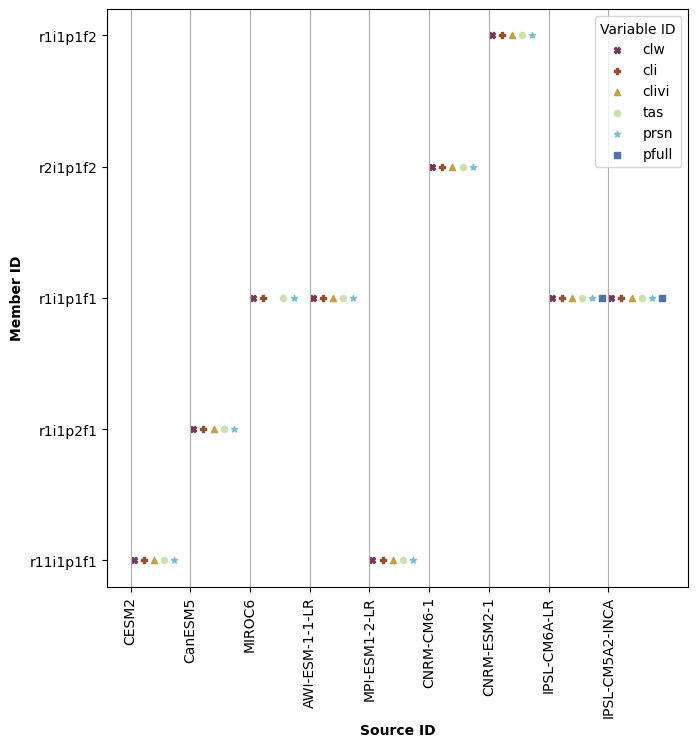

In [15]:
f, axsm = plt.subplots(1,1, figsize=[7.5, 7.5])

for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique())), ):
    
    if i == 0:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', color=cm.romaO(range(0, 256, int(256 / 6)))[0], label='clw', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', color=cm.romaO(range(0, 256, int(256 / 6)))[1], label='cli', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', color=cm.romaO(range(0, 256, int(256 / 6)))[2], label='clivi', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', color=cm.romaO(range(0, 256, int(256 / 6)))[3], label='tas', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', color=cm.romaO(range(0, 256, int(256 / 6)))[4], label='prsn', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'pfull']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='s', color=cm.romaO(range(0, 256, int(256 / 6)))[5], label='pfull', )#alpha=0.5, edgecolors='none')
    
    
    else:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', color=cm.romaO(range(0, 256, int(256 / 6)))[0], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', color=cm.romaO(range(0, 256, int(256 / 6)))[1], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', color=cm.romaO(range(0, 256, int(256 / 6)))[2], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', color=cm.romaO(range(0, 256, int(256 / 6)))[3], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', color=cm.romaO(range(0, 256, int(256 / 6)))[4], label='_nolegend_', )#alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'pfull']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='s', color=cm.romaO(range(0, 256, int(256 / 6)))[5], label='pfull', )#alpha=0.5, edgecolors='none')
    

axsm.legend(labels=['clw', 'cli', 'clivi', 'tas', 'prsn', 'pfull'], loc=0, title='Variable ID', )
axsm.set_xticks(ticks=range(len(da['source_id'].unique())), labels=da['source_id'].unique(),rotation=90, fontsize=10)

# axsm.set_yticks(da['yloc'].unique(), labels=da['member_id'].unique(), fontsize=8)
axsm.grid(axis='x')
# Set common labels
axsm.set_xlabel('Source ID', fontweight='bold')
axsm.set_ylabel('Member ID', fontweight='bold');

plt.savefig(FIG_DIR + 'cmip6_model_variables.png', format = 'png', bbox_inches = 'tight', transparent = False)

In [9]:
# download = pd.DataFrame(columns=['index','node', 'mdir', 'file'])
# download = download.set_index('index')

# _down = pd.DataFrame({'index': range(len(da))}, columns=['index','node', 'mdir', 'file'])
# _down = _down.set_index('index')

# for i in da['source_id'].unique():
#     idx_node = da.loc[da['source_id'] == i].index
    
#     if (da.loc[da['source_id'] == i]['source_id'] == 'MIROC6').all() == True:
#             _down['node'][idx_node] = 'http://esgf-data2.diasjp.net/thredds/fileServer/esgd_dicttaroot/CMIP6/'
#             time_range = ['20000101-20091231', '20100101-20141231']
#             d_dict = dict()

            
#     if (da.loc[da['source_id'] == i]['source_id'] == 'CESM2').all() == True:
#             _down['node'][idx_node] = 'http://esgf-data.ucar.edu/thredds/fileServer/esgd_dicttaroot/CMIP6/'
#             time_range = ['20000101-20150101']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'CanESM5').all() == True:
#             _down['node'][idx_node] = 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esgCd_dicttaroot/AR6/CMIP6/'
#             time_range = ['18500101-20141231']
#             d_dict = dict()

            
#     if (da.loc[da['source_id'] == i]['source_id'] == 'AWI-ESM-1-1-LR').all() == True:
#             _down['node'][idx_node] = 'http://esgf3.dkrz.de/thredds/fileServer/cmip6/'
#             time_range = ['20070101-20071231','20080101-20081231',
#                           '20090101-20091231','20100101-20101231']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'MPI-ESM1-2-LR').all() == True:
#             _down['node'][idx_node] = 'http://esgf3.dkrz.de/thredds/fileServer/cmip6/'
#             time_range = ['19900101-20091231','20100101-20141231']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'UKESM1-0-LL').all() == True:
#             _down['node'][idx_node] = 'https://esgf.ceda.ac.uk/thredds/fileServer/esg_cmip6/CMIP6/'
#             time_range = ['19500101-20141230']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'HadGEM3-GC31-LL').all() == True:
#             _down['node'][idx_node] = 'https://esgf.ceda.ac.uk/thredds/fileServer/esg_cmip6/CMIP6/'
#             time_range = ['19500101-20141230']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'CNRM-CM6-1').all() == True:
#             _down['node'][idx_node] = 'http://esg1.umr-cnrm.fr/thredds/fileServer/CMIP6_CNRM/'
#             time_range = ['19500101-20141231']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'CNRM-ESM2-1').all() == True:
#             _down['node'][idx_node] = 'http://esg1.umr-cnrm.fr/thredds/fileServer/CMIP6_CNRM/'
#             time_range = ['19500101-20141231']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'IPSL-CM6A-LR').all() == True:
#             _down['node'][idx_node] = 'http://vesg.ipsl.upmc.fr/thredds/fileServer/cmip6/'
#             time_range = ['18500101-20141231']
#             d_dict = dict()


#     if (da.loc[da['source_id'] == i]['source_id'] == 'IPSL-CM5A2-INCA').all() == True:
#             _down['node'][idx_node] = 'http://vesg.ipsl.upmc.fr/thredds/fileServer/cmip6/'
#             time_range = ['18500101-20141231']
#             d_dict = dict()

#     for var_id in da['variable_id'].unique():    
#         idx_var = (da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id].index
        
#         if len(idx_var) != 0:
             
#             _down['mdir'][idx_var] = '{activity}/{institution}/{model}/{experiment}/{member}/{table}/{variable}/{grid}/v{version}/'.format(activity=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['activity_id'].values[0],
#                                                                                                                                         institution=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['institution_id'].values[0],
#                                                                                                                                         model=i,
#                                                                                                                                         experiment=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['experiment_id'].values[0],
#                                                                                                                                         member=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['member_id'].values[0],
#                                                                                                                                         table=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['table_id'].values[0],
#                                                                                                                                         variable=var_id,
#                                                                                                                                         grid=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['grid_label'].values[0],
#                                                                                                                                         version=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['version'].values[0])
#             for tid, k in zip(time_range, range(len(time_range))):
#                 # print(tid, k)
#                 d_dict[tid] = (_down.loc[idx_node]).loc[idx_var]
#                 d_dict[tid]['file'][idx_var] ='{variable}_{table}_{model}_{experiment}_{member}_{grid}_{time_range}.nc'.format(variable=var_id, 
#                                                                                                                                     table=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['table_id'].values[0],
#                                                                                                                                     model=i,
#                                                                                                                                     experiment=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['experiment_id'].values[0],
#                                                                                                                                     member=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['member_id'].values[0], 
#                                                                                                                                     grid=((da.loc[da['source_id'] == i]).loc[da['variable_id'] == var_id])['grid_label'].values[0],
#                                                                                                                                     time_range=time_range[k])

#                 download = pd.concat([download, d_dict[tid]])   
#                 download.reset_index(inplace=True, drop=True)                                       
#         else: 
#             continue                

In [13]:

counter = 0
# 
# 

node = 'http://esgf3.dkrz.de/thredds/fileServer/cmip6/CMIP/'
mdir = 'MPI-M/MPI-ESM1-2-LR/historical/r11i1p1f1/day/prsn/gn/v20210901/'
file = 'prsn_day_MPI-ESM1-2-LR_historical_r11i1p1f1_gn_19900101-20091231.nc' #

# 
# 

dwf = node + mdir + file
file_out = cmip_out + '/' + file
        
files = glob(file_out)
if file_out in files:
            print(file_out + ' is downloaded')
            counter += 1
            print("Have downloaded in total : " + str(counter) + " files")

else:
            # print(dwf)
            # print(file_out)
            print('Download file ... {}'.format(file_out))
            # Download file
            wget.download(dwf, file_out)

Download file ... /scratch/franzihe/input/cmip6_hist/daily_means/prsn_day_MPI-ESM1-2-LR_historical_r11i1p1f1_gn_19900101-20091231.nc


In [ ]:
# counter = 0
# for i in range(len(download)):
#     node = download['node'][i]
#     mdir = download['mdir'][i]
#     file = download['file'][i]

#     dwf = node + mdir + file
#     file_out = cmip_out + '/' + file
    
#     files = glob(file_out)
#     if file_out in files:
#         print(file_out + ' is downloaded')
#         counter += 1
#         print("Have downloaded in total : " + str(counter) + " files")
#     else:
#         # print(dwf)
#         # print(file_out)
#         print('Download file ...')
#         # Download file
#         wget.download(dwf, file_out)

In [ ]:
# save all models and variables in excel
da.to_excel('{}/cmip6_model_variables.xlsx'.format(cmip_out), columns=['activity_id', 
                                                   'institution_id', 
                                                   'source_id',
                                                   'experiment_id',
                                                   'member_id',
                                                   'table_id',
                                                   'variable_id',
                                                   'grid_label',
                                                   'version'])